## Procesamiento de Lenguaje Natural con Python

### Profesor: José Incio, Ph.D
#### Departamento de Ciencias Sociales - Sociología
- correo: jincio@pucp.pe
- web: www.joseincio.com

## Objetivos de esta sesión

- Una breve introducción a las clases en Python
- Vectorización
- Arrays
- Tipos de matrices
  - Frecuencia
  - Booleanas
  - TF - ID

In [ ]:
!pip install python-docx
from docx import Document

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir("/content/drive/MyDrive/QLAB_2023")

Mounted at /content/drive


## Clases

In [ ]:
x = 2
print(isinstance(x,int))
y = list(range(4))
print(isinstance(y,list))

True
True


Podemos definir nuestra propia CLASE de objetos

- usa el `class` argument
- puedes asignarle `attributes`, varlores relacionados con el objeto
- puedes crear `methods`, estos son "superpoderes" que la clase puede hacer/tener

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        print(f"Hola, mi nombre es {self.nombre} y tengo {self.edad} años.")

# Crear una instancia de la clase Persona
p1 = Persona("Juan", 25)

# Llamar al método saludar de la instancia p1
p1.saludar()

Hola, mi nombre es Juan y tengo 25 años.


En este ejemplo, se define una clase llamada Persona con un método especial llamado __init__, que se utiliza para inicializar los atributos de la instancia de la clase. En este caso, los atributos son nombre y edad. También se define un método llamado saludar, que imprime un mensaje de saludo utilizando los atributos de la instancia.

Luego, se crea una instancia de la clase Persona llamada p1, pasando los argumentos "Juan" y 25 al método __init__. Finalmente, se llama al método saludar de la instancia p1, que imprime el mensaje de saludo utilizando los atributos de la instancia.

In [ ]:
class Estudiante(Persona):
    def __init__(self, nombre, edad, matricula):
        super().__init__(nombre, edad) ## Ya no tengo que decirle los valores iniciale
        self.matricula = matricula

    def presentarse(self):
        print(f"Hola, mi nombre es {self.nombre}, tengo {self.edad} años y mi número de matrícula es {self.matricula}.")

# Crear una instancia de la clase Estudiante
e1 = Estudiante("Ana", 20, "A01234567")

# Llamar al método presentarse de la instancia e1. Método heredado
e1.presentarse()

# Llamar al método saludar (heredado de la clase Persona) de la instancia e1
e1.saludar()

Hola, mi nombre es Ana, tengo 20 años y mi número de matrícula es A01234567.
Hola, mi nombre es Ana y tengo 20 años.


**Estudiante** hereda la clase persona!
agregamos un nuevo atributo! Matrícula!

El método __init__ de la clase Estudiante llama al método __init__ de la clase base (Persona) utilizando la función super() para inicializar los atributos heredados (nombre y edad).

También se define un nuevo método llamado presentarse, que imprime un mensaje utilizando los atributos de la instancia (incluyendo el atributo heredado nombre).

In [ ]:
class fruit:
    def __init__(self, precio, maduracion):
        self.precio = precio
        self.maduracion = maduracion

    def age(self, tiempo):
        self.maduracion = self.maduracion+tiempo
        if self.maduracion<4:
            print("no está listo para comer")
        elif self.maduracion==4:
            print("snack time")
        else:
            print("se paso el tren, a botarlo")

pieceOfFruit1 = fruit(precio=2.5, maduracion=0)
pieceOfFruit1

In [ ]:
isinstance(pieceOfFruit1, fruit)

True

In [ ]:
pieceOfFruit1.precio

2.5

In [ ]:
pieceOfFruit1.age(2)

no está listo para comer


In [ ]:
class bananna(fruit):
    def __init__(self, precio, maduracion, color="amarillo", optimalmaduracion=6):
        fruit.__init__(self, precio, maduracion)
        self.color = color
        self.optimalmaduracion = 6

    def age(self, time):
        self.maduracion = self.maduracion+time
        if self.maduracion<self.optimalmaduracion:
            print("no apta para comer")
        elif self.maduracion==self.optimalmaduracion:
            print("snack time")
        else:
            print("se paso el tren")


myBanannaInstance = bananna(precio=1.2, maduracion=1)
myBanannaInstance.color

'amarillo'

## Vectorización

Aplicando todo lo que hemos aprendido hasta el momento...

Dentro de la vectorización:

*Cada documento se representa como el conjunto múltiple de tokens que lo componen y el valor de cada posición de palabra en el vector es su recuento.*

Tranquilos, vamos por pasos...!!!

- Pensemos en la vectorización como un ***modelo de codificación de vectores***
- En su versión más básica es simplemente completar el vector con la frecuencia de cada palabra tal como aparece en el documento.
- Esta representación puede ser una codificación de recuento directo (un conteo en palabras más simples) o una codificación normalizada donde cada palabra se pondera según el número total de palabras del documento.

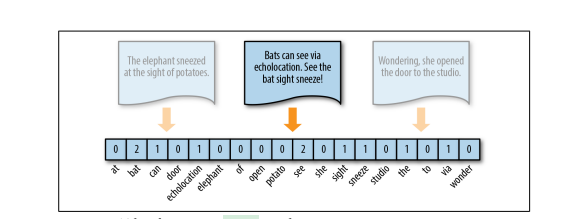

Sin embargo, pueden surgir alguna preguntas...
- ¿Cómo hacemos con varios documentos?
- Si se trata de muchos documentos, ¿cuántas palabras se considerían en este conteo?
- ¿Es siempre necesario utilizar conteos, no es mejor usar porcentajes si las palabras son frecuentes?
### Vamos por pasos!!

## Arrays

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- Numpy es una librería muy poderosa
- Es muy buena para trabajar con objetos de muchas dimensiones.
- Para hacer algebra lineal ;)
- Y en nuestro caso nos ayudará a trabajar con VECTORES!!!


- El objeto principal de numpy son los `arrays` ..`np.array` o `np.ndarray`

In [ ]:
#np es la convención para llamar a numpy
miVec = np.array([0,1,2,3,4,5])
print("mi primer vector:", miVec)
print("Los primeros tres elementos", miVec[0:3])
print("El tipo de objeto según python ", type(miVec))

mi primer vector: [0 1 2 3 4 5]
Los primeros tres elementos [0 1 2]
El tipo de objeto según python  <class 'numpy.ndarray'>


- Los arrays son objetos multidimensionales.
- Los vectores son casos especiales de array. Son arrays de una sola dimensión.
- Pero los arrays pueden tener más de una dimensión...

- Las matrices son arrays de dos dimensiones..

En este caso las matrices son la combinación de dos arrays de tamaños (p,q)
- O también se puede decir que es es una 'transformación lineal' de los vectores p y q.
- $$
\left[
\begin{array}{ccccc}
x_{0,0}    & x_{0,1}   & x_{0,2}   & \cdots & x_{0,q-2}   & x_{0,q-1} \\
x_{1,0}    & x_{1,1}   & x_{1,2}   & \cdots & x_{1,q-2}   & x_{1,q-1} \\
x_{2,0}    & x_{2,1}   & x_{2,2}   & \cdots & x_{2,q-2}   & x_{2,q-1} \\
\cdots     & \cdots    & \cdots    & \cdots & \cdots      & \cdots \\
x_{p-2,0}  & x_{p-2,1} & x_{p-2,2} & \cdots & x_{p-2,q-2} & x_{p-2,q-1} \\
x_{p-1,0}    & x_{p-1,1}   & x_{p-1,2}   & \cdots & x_{p-1,q-1}   & x_{p-1,q-1} \\
\end{array}
\right]
$$

**¿Podemos pensar en arrays de más dimensiones?**
- Sí!

$$
\begin{array}{c@{}c@{}}
\left[
{\scriptscriptstyle
\begin{array}{cccccc}
x_{0,0}^{(0)}    & x_{0,1}^{(0)}   & x_{0,2}^{(0)}   & \cdots & x_{0,q-2}^{(0)}   & x_{0,q-1}^{(0)} \\
x_{1,0}^{(0)}    & x_{1,1}^{(0)}   & x_{1,2}^{(0)}   & \cdots & x_{1,q-2}^{(0)}   & x_{1,q-1}^{(0)} \\
x_{2,0}^{(0)}    & x_{2,1}^{(0)}   & x_{2,2}^{(0)}   & \cdots & x_{2,q-2}^{(0)}   & x_{2,q-1}^{(0)} \\
\cdots     & \cdots    & \cdots    & \cdots & \cdots      & \cdots \\
x_{p-2,0}^{(0)}  & x_{p-2,1}^{(0)} & x_{p-2,2}^{(0)} & \cdots & x_{p-2,q-2}^{(0)} & x_{p-2,q-1}^{(0)} \\
x_{p-1,0}^{(0)}    & x_{p-1,1}^{(0)}   & x_{p-1,2}^{(0)}   & \cdots & x_{p-1,q-2}^{(0)}   & x_{p-1,q-1}^{(0)} \\
\end{array}
}
\right]
    & \ddots \\
\ddots   &
\left[
\begin{array}{cccccc}
x_{0,0}^{(z)}    & x_{0,1}^{(z)}   & x_{0,2}^{(z)}   & \cdots & x_{0,q-2}^{(z)}   & x_{0,q-1}^{(z)} \\
x_{1,0}^{(z)}    & x_{1,1}^{(z)}   & x_{1,2}^{(z)}   & \cdots & x_{1,q-2}^{(z)}   & x_{1,q-1}^{(z)} \\
x_{2,0}^{(z)}    & x_{2,1}^{(z)}   & x_{2,2}^{(z)}   & \cdots & x_{2,q-2}^{(z)}   & x_{2,q-1}^{(z)} \\
\cdots     & \cdots    & \cdots    & \cdots & \cdots      & \cdots \\
x_{p-2,0}^{(z)}  & x_{p-2,1}^{(z)} & x_{p-2,2}^{(z)} & \cdots & x_{p-2,q-2}^{(z)} & x_{p-2,q-1}^{(z)} \\
x_{p-1,0}^{(z)}    & x_{p-1,1}^{(z)}   & x_{p-1,2}^{(z)}   & \cdots & x_{p-1,q-2}^{(z)}   & x_{p-1,q-1}^{(z)} \\
\end{array}
\right]
\end{array}
$$

- En este caso tenemos Matrices anidadas.. todas con un indice similar (z)
- Este es un caso de lo que se llama `tensor`. En Machine Learning es muy común.

### Tipos de arrays

In [ ]:
morpheus = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])
print("My primera matrix se llama:\n", morpheus)
print("La primera fila:\n", morpheus[0])
print("La primera columna:\n", morpheus[:,0])
type(morpheus)

My primera matrix se llama:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
La primera fila:
 [0 1 2 3]
La primera columna:
 [0 4 8]


numpy.ndarray

In [ ]:
print("Este vector tiene %1d dimensión con %1d elementos" %(miVec.ndim, miVec.shape[0]))

Este vector tiene 1 dimensión con 6 elementos


In [ ]:
print(morpheus.shape)
print(miVec.shape)

(3, 4)
(6,)


In [ ]:
print(np.arange(start=2,stop=11,step=2))

[ 2  4  6  8 10]


In [ ]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

![](https://cdn.memegenerator.es/imagenes/memes/full/15/11/15114411.jpg)

-  Y se estarán preguntando... ¿Por qué es útil saber todo eso?
- arrays tienen métodos que permiten hacer cálculos más rápidos que otros objetos!
- arrays nos permiten trabajar con dimensiones.. ¿saben quien tiene muchas dimensiones..?


<h2 style="color: red;">TEXTO</h2>

- Los arrays tienen ejes.


In [ ]:
x = np.array(
    [[2, 3, 4],
     [5, 50, 500]])
x.shape

(2, 3)

In [ ]:
y = np.array(
    [[[2, 3, 4,5],
     [5, 50, 500, 5000]],
     [[3, 4, 5, 6],
      [6, 60, 600, 6000]],
     [[4, 5, 7, 8],
      [7, 70, 700, 7000]]
    ])


In [ ]:
y

array([[[   2,    3,    4,    5],
        [   5,   50,  500, 5000]],

       [[   3,    4,    5,    6],
        [   6,   60,  600, 6000]],

       [[   4,    5,    7,    8],
        [   7,   70,  700, 7000]]])

In [ ]:
y.shape

(3, 2, 4)

El orden de los ejes es importante

 - $(i,j,k)$
   - $i$: número de matrices
   - $j$: número de filas en cada matriz
   - $k$: número de columnas en cada matriz

Obetenr un elemento individual $y_{j,k}^{(i)}$ o $y[i,j,k]$ con:

##¿Qué número obtendremos?
`y[1,1,1]`


In [ ]:
y[1,1,1]

60

**¿y con este código?**
`y[0,:,:]`

In [ ]:
y[0,:,:]

array([[   2,    3,    4,    5],
       [   5,   50,  500, 5000]])

Y este: `y[:,1,2]`

In [ ]:
y[:,1,2]

array([500, 600, 700])

![](https://plantillasdememes.com/img/plantillas/wey-ya21580921268.jpg)

- Esto es importante ya que usualmente tenemos que movernos entre matrices cuando trabajemos con texto.
- Además también nos permite aplicar funciones a través de las matrices y dimensiones.

In [ ]:
x = np.arange(30).reshape(10,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

**¿Cómo sumo todas las filas?**

In [ ]:
x.sum(0)

array([135, 145, 155])

- y que me dará `x.sum(1)`

In [ ]:
x.sum(1)

array([ 3, 12, 21, 30, 39, 48, 57, 66, 75, 84])

Regresaremos a esto cuando trabajemos a sentiment analysis!

![](https://i.chzbgr.com/full/9524300032/h6FB7A94A/person-someone-says-sorry-calling-nerd-there-is-no-need-apologize-iwas-not-offended-thebeamup)

## Tipos de Matrices/Vectores

### Frecuencias
- El modelo de codificación de vectores más simple es completar el vector con la frecuencia de cada palabra tal como aparece en el documento.
- Cada documento se representa como el conjunto múltiple de tokens que lo componen y el valor de cada uno.

- La posición de la palabra en el vector es su recuento. Esta representación puede ser una codificación de recuento directo (entera) o una codificación normalizada donde cada palabra se pondera según el número total de palabras del documento.

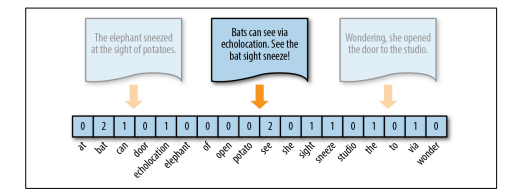

### Boleanas
- Al ser la matriz de frecuencias un conteo "neto" los tokens que ocurren con mucha frecuencia son órdenes de magnitud más “significativos” que otros menos frecuentes. Hay mucho ruido de palabras que son repetitivas, pero no necesariamente importantes
- Una solución a este problema es la codificación one-hot, un método de codificación vectorial booleana que marca un índice vectorial particular con un valor verdadero (1) si el token existe en el documento y falso (0) si no existe. (Marca la existencia, no existencia del término)
- Esta reducción es mejor para documentos pequeños (oraciones, tweets) que no contienen muchos elementos repetidos.
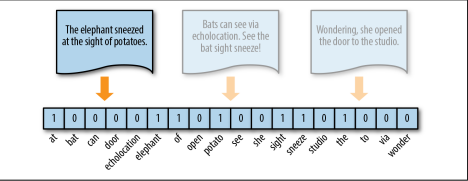

## Term Frequency–Inverse Document Frequency (TF-IDF)

- Las formas que hemos explorado hasta ahora sólo describen un documento de forma independiente, sin tener en cuenta el contexto del corpus. Un mejor enfoque sería considerar la frecuencia relativa o rareza de los tokens en el documento frente a su frecuencia en otros documentos.
- La idea central es que lo más probable es que el significado esté codificado en los términos más raros de un documento.
- La codificación normaliza la frecuencia de los tokens en un documento con respecto al resto del corpus. Este enfoque de codificación acentúa los términos que son muy relevantes para una instancia específica.
- En palabras sencillas, se le otorga un peso correspondiente a un término en función de qué tan probable es encontrarlo en el resto del corpus
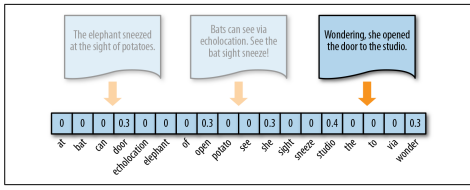

## Texto a vectores

In [ ]:
os.listdir(".")

['Presentaciones',
 'Gobiernos revolucionarios.docx',
 'transcripcion 2.docx',
 'Untitled spreadsheet.gsheet',
 '.ipynb_checkpoints',
 'Presentación_Qlab.slides (2).html',
 'Presentación_Qlab.ipynb',
 'mensajepresidencialVP.txt',
 'ejemplo.txt',
 'ejemplo.ipynb',
 'DO',
 'Pds',
 'adrianatudelag.json',
 'SilaboNPL - Incio.docx',
 'Zavaleta et al. (2018).pdf',
 'Gobierno Fujimori.docx',
 'Consenso de Washington.docx']

In [ ]:
texto1 = Document("Gobiernos revolucionarios.docx")
texto2 = Document("Gobierno Fujimori.docx")
texto3 = Document("Consenso de Washington.docx")

In [ ]:
doc1 = ""
doc2 = ""
doc3 = ""

for paragraph in texto1.paragraphs:
    doc1 += paragraph.text + "\n"

for paragraph in texto2.paragraphs:
    doc2 += paragraph.text + "\n"

for paragraph in texto3.paragraphs:
    doc3 += paragraph.text + "\n"

In [ ]:
## Usemos nuestras funciones
## Funciones
import re
def lowerIt(tokenList):
    '''Lower case all tokens,
      input:
        tokenList: list of tokens
      output:
        a list of lower case tokens
    '''
    return [i.lower() for i in tokenList]

def tokenEspacioBlanco(doc):
    '''Tokeniza un texto usando la regla: "separar espacio en blanco"
      input:
        doc: es un solo string
      output:
        una lista de strings
    '''
    return doc.split()

In [ ]:
## Nueva función con REGX

def removePunctuation(string):
    punctList = [",","\\.",";","-","'",'"',"!","`","'"]
    for item in punctList:
        string = re.sub(item, "", string)
    return string

def removetildes(string):
    list1 = ["á","é","í","ó","ú"]
    list2 = ["a","e","i","o","u"]
    for i in range(len(list1)):
        string = string.replace(list1[i], list2[i])
    return string

### Limpiamos nuestroc docs

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#snowballStemmer = SnowballStemmer("spanish")

stop= stopwords.words("spanish")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def Token_limpio(doc):
    tokens=lowerIt(tokenEspacioBlanco(removePunctuation(removetildes(doc))))
    tokens_1= [word for word in tokens if word not in stop]
    return tokens_1

In [ ]:
test1=Token_limpio(doc1)
test1

['siglo',
 'xx',
 'america',
 'latina',
 'caracterizo',
 'inestabilidad',
 'politica',
 'desigualdad',
 'social',
 'contexto',
 'movimientos',
 'revolucionarios',
 'buscaron',
 'generar',
 'trasformaciones',
 'formas',
 'organizacion',
 'politica',
 'economica',
 'social',
 'principales',
 'actores',
 'sectores',
 'menos',
 'atendidos',
 'campesinos',
 'obreros',
 'etc',
 'cuba',
 'chile',
 'argentina',
 'surgieron',
 'dichos',
 'movimientos',
 'consolidaron',
 'gobiernos',
 'aunque',
 'comparten',
 'muchas',
 'similitudes',
 'tambien',
 'existen',
 'diferencias',
 'notables',
 'primero',
 'tres',
 'gobiernos',
 'aplicaron',
 'politicas',
 'progresistas',
 'economia',
 'fin',
 'asegurar',
 'bienestar',
 'sectores',
 'respaldaban',
 'gobiernos',
 'revolucionarios',
 'ademas',
 'cambiar',
 'jerarquias',
 'poder',
 'cuba',
 'ley',
 'reforma',
 'agraria',
 'nacionalizacion',
 'empresas',
 'extranjeras',
 'principalmente',
 'estadounidenses',
 'establecimiento',
 'precios',
 'fijos',
 'aume

In [ ]:
def frecuenciaTerminos(doc, returnList=False):
    '''Crea un diccionario o lista de términos en un documento
    Input:
      doc: lista de tokens
      returnList: diccionario es el default, si quieres lista cambia el parámetro
    Output:
        diccionario o lista de tuples
    '''
    from collections import Counter
    out = Counter()
    for token in doc:
        # incrementa con nuevos tokens. Counters una función muy útil
        out[token] += 1
    if not returnList:
        return out
    elif returnList:
        return [(key,val) for key,val in out.items()]
    else:
        print("Elige lista o diccionarios. ")

In [ ]:
frecuenciaTerminos(test1)

Counter({'siglo': 1,
         'xx': 1,
         'america': 1,
         'latina': 1,
         'caracterizo': 2,
         'inestabilidad': 1,
         'politica': 4,
         'desigualdad': 2,
         'social': 3,
         'contexto': 1,
         'movimientos': 2,
         'revolucionarios': 3,
         'buscaron': 2,
         'generar': 1,
         'trasformaciones': 1,
         'formas': 1,
         'organizacion': 2,
         'economica': 2,
         'principales': 1,
         'actores': 1,
         'sectores': 4,
         'menos': 1,
         'atendidos': 1,
         'campesinos': 1,
         'obreros': 1,
         'etc': 1,
         'cuba': 8,
         'chile': 3,
         'argentina': 2,
         'surgieron': 1,
         'dichos': 1,
         'consolidaron': 1,
         'gobiernos': 8,
         'aunque': 2,
         'comparten': 1,
         'muchas': 1,
         'similitudes': 2,
         'tambien': 2,
         'existen': 1,
         'diferencias': 1,
         'notables': 1,
     

### Juntamos todo?

In [ ]:
def myPipeline(doc):
    '''Run the pre-processing steps on doc'''
    return frecuenciaTerminos(
           Token_limpio(doc)
        )

In [ ]:
docus=[doc1,doc2,doc3]

In [ ]:
myDocsProcesados = []
for doc in docus:
    myDocsProcesados.append(myPipeline(doc))

In [ ]:
myDocsProcesados

[Counter({'siglo': 1,
          'xx': 1,
          'america': 1,
          'latina': 1,
          'caracterizo': 2,
          'inestabilidad': 1,
          'politica': 4,
          'desigualdad': 2,
          'social': 3,
          'contexto': 1,
          'movimientos': 2,
          'revolucionarios': 3,
          'buscaron': 2,
          'generar': 1,
          'trasformaciones': 1,
          'formas': 1,
          'organizacion': 2,
          'economica': 2,
          'principales': 1,
          'actores': 1,
          'sectores': 4,
          'menos': 1,
          'atendidos': 1,
          'campesinos': 1,
          'obreros': 1,
          'etc': 1,
          'cuba': 8,
          'chile': 3,
          'argentina': 2,
          'surgieron': 1,
          'dichos': 1,
          'consolidaron': 1,
          'gobiernos': 8,
          'aunque': 2,
          'comparten': 1,
          'muchas': 1,
          'similitudes': 2,
          'tambien': 2,
          'existen': 1,
          'difere

![](https://media.tenor.com/B7S0sie05M4AAAAC/sex-education-eric.gif)

## hemos transformado los documentos a TF
- Siguiente paso. Pasemos del documento a vectores!
- Para eso debemos alinear los documentos?


In [ ]:
def alineate(documentosprocesados):
    '''Alineamos las frecuencias de los términos creando un superset de terminos:
      'vocab' - terminos como llaves y su indice
      'alignedDocList' - lista de documentos, donde cada documento es un vector con sus terminos y frecuencias
    '''
    LoPD = documentosprocesados
    vocab = {}
    alignedDocList = []
    termIndexCounter = 0
    for doc in LoPD:
        for term in doc.keys():
            if term not in vocab.keys():
                vocab[term] = termIndexCounter #  Asignar un nuevo término al índice
                termIndexCounter += 1 #  Incrementar al siguiente índice disponible
            elif term in vocab.keys():
                pass  #  No hagas nada, ya tenemos este término en el diccionario de vocabulario
    for n,doc in enumerate(LoPD):
        #Inicializar con la longitud apropiada del output
        alignedDocList.append([0 for i in vocab.keys()])
        # tenemos un diccionario?
        for token, val in doc.items(): ## Items del diccionario.
            alignedDocList[n][vocab[token]] =  val  # Asignar el número al vector del índice para el token
    return {"vocab": vocab, "alignedDocList": alignedDocList}

In [ ]:
test1=myDocsProcesados[0]
test2=myDocsProcesados[1]
test3=myDocsProcesados[2]
test1

Counter({'siglo': 1,
         'xx': 1,
         'america': 1,
         'latina': 1,
         'caracterizo': 2,
         'inestabilidad': 1,
         'politica': 4,
         'desigualdad': 2,
         'social': 3,
         'contexto': 1,
         'movimientos': 2,
         'revolucionarios': 3,
         'buscaron': 2,
         'generar': 1,
         'trasformaciones': 1,
         'formas': 1,
         'organizacion': 2,
         'economica': 2,
         'principales': 1,
         'actores': 1,
         'sectores': 4,
         'menos': 1,
         'atendidos': 1,
         'campesinos': 1,
         'obreros': 1,
         'etc': 1,
         'cuba': 8,
         'chile': 3,
         'argentina': 2,
         'surgieron': 1,
         'dichos': 1,
         'consolidaron': 1,
         'gobiernos': 8,
         'aunque': 2,
         'comparten': 1,
         'muchas': 1,
         'similitudes': 2,
         'tambien': 2,
         'existen': 1,
         'diferencias': 1,
         'notables': 1,
     

In [ ]:
vocab = {}
termIndexCounter = 0
for term in test1.keys():
            if term not in vocab.keys():
                vocab[term] = termIndexCounter #  Asignar un nuevo término al índice
                termIndexCounter += 1 #  Incrementar al siguiente índice disponible
            elif term in vocab.keys():
                pass  #  No hagas nada, ya tenemos este término en el diccionario de vocabulario



In [ ]:
vocab

{'siglo': 0,
 'xx': 1,
 'america': 2,
 'latina': 3,
 'caracterizo': 4,
 'inestabilidad': 5,
 'politica': 6,
 'desigualdad': 7,
 'social': 8,
 'contexto': 9,
 'movimientos': 10,
 'revolucionarios': 11,
 'buscaron': 12,
 'generar': 13,
 'trasformaciones': 14,
 'formas': 15,
 'organizacion': 16,
 'economica': 17,
 'principales': 18,
 'actores': 19,
 'sectores': 20,
 'menos': 21,
 'atendidos': 22,
 'campesinos': 23,
 'obreros': 24,
 'etc': 25,
 'cuba': 26,
 'chile': 27,
 'argentina': 28,
 'surgieron': 29,
 'dichos': 30,
 'consolidaron': 31,
 'gobiernos': 32,
 'aunque': 33,
 'comparten': 34,
 'muchas': 35,
 'similitudes': 36,
 'tambien': 37,
 'existen': 38,
 'diferencias': 39,
 'notables': 40,
 'primero': 41,
 'tres': 42,
 'aplicaron': 43,
 'politicas': 44,
 'progresistas': 45,
 'economia': 46,
 'fin': 47,
 'asegurar': 48,
 'bienestar': 49,
 'respaldaban': 50,
 'ademas': 51,
 'cambiar': 52,
 'jerarquias': 53,
 'poder': 54,
 'ley': 55,
 'reforma': 56,
 'agraria': 57,
 'nacionalizacion': 58,


In [ ]:
for term in test2.keys():
            if term not in vocab.keys():
                vocab[term] = termIndexCounter #  Asignar un nuevo término al índice
                termIndexCounter += 1 #  Incrementar al siguiente índice disponible
            elif term in vocab.keys():
                pass  #  No hagas nada, ya tenemos este término en el diccionario de vocabulario


In [ ]:
vocab

{'siglo': 0,
 'xx': 1,
 'america': 2,
 'latina': 3,
 'caracterizo': 4,
 'inestabilidad': 5,
 'politica': 6,
 'desigualdad': 7,
 'social': 8,
 'contexto': 9,
 'movimientos': 10,
 'revolucionarios': 11,
 'buscaron': 12,
 'generar': 13,
 'trasformaciones': 14,
 'formas': 15,
 'organizacion': 16,
 'economica': 17,
 'principales': 18,
 'actores': 19,
 'sectores': 20,
 'menos': 21,
 'atendidos': 22,
 'campesinos': 23,
 'obreros': 24,
 'etc': 25,
 'cuba': 26,
 'chile': 27,
 'argentina': 28,
 'surgieron': 29,
 'dichos': 30,
 'consolidaron': 31,
 'gobiernos': 32,
 'aunque': 33,
 'comparten': 34,
 'muchas': 35,
 'similitudes': 36,
 'tambien': 37,
 'existen': 38,
 'diferencias': 39,
 'notables': 40,
 'primero': 41,
 'tres': 42,
 'aplicaron': 43,
 'politicas': 44,
 'progresistas': 45,
 'economia': 46,
 'fin': 47,
 'asegurar': 48,
 'bienestar': 49,
 'respaldaban': 50,
 'ademas': 51,
 'cambiar': 52,
 'jerarquias': 53,
 'poder': 54,
 'ley': 55,
 'reforma': 56,
 'agraria': 57,
 'nacionalizacion': 58,


In [ ]:
for term in test3.keys():
            if term not in vocab.keys():
                vocab[term] = termIndexCounter #  Asignar un nuevo término al índice
                termIndexCounter += 1 #  Incrementar al siguiente índice disponible
            elif term in vocab.keys():
                pass  #  No hagas nada, ya tenemos este término en el diccionario de vocabulario


In [ ]:
vocab

{'siglo': 0,
 'xx': 1,
 'america': 2,
 'latina': 3,
 'caracterizo': 4,
 'inestabilidad': 5,
 'politica': 6,
 'desigualdad': 7,
 'social': 8,
 'contexto': 9,
 'movimientos': 10,
 'revolucionarios': 11,
 'buscaron': 12,
 'generar': 13,
 'trasformaciones': 14,
 'formas': 15,
 'organizacion': 16,
 'economica': 17,
 'principales': 18,
 'actores': 19,
 'sectores': 20,
 'menos': 21,
 'atendidos': 22,
 'campesinos': 23,
 'obreros': 24,
 'etc': 25,
 'cuba': 26,
 'chile': 27,
 'argentina': 28,
 'surgieron': 29,
 'dichos': 30,
 'consolidaron': 31,
 'gobiernos': 32,
 'aunque': 33,
 'comparten': 34,
 'muchas': 35,
 'similitudes': 36,
 'tambien': 37,
 'existen': 38,
 'diferencias': 39,
 'notables': 40,
 'primero': 41,
 'tres': 42,
 'aplicaron': 43,
 'politicas': 44,
 'progresistas': 45,
 'economia': 46,
 'fin': 47,
 'asegurar': 48,
 'bienestar': 49,
 'respaldaban': 50,
 'ademas': 51,
 'cambiar': 52,
 'jerarquias': 53,
 'poder': 54,
 'ley': 55,
 'reforma': 56,
 'agraria': 57,
 'nacionalizacion': 58,


¿Por que el (primer término del test2) no tiene el orden 13?

In [ ]:
alignedDocList = []

for n, doc in enumerate(myDocsProcesados):
    print(n)
    print(doc)

alignedDocList.append([0 for i in vocab.keys()])

0
Counter({'cuba': 8, 'gobiernos': 8, 'gobierno': 8, 'economia': 6, 'allende': 5, 'peron': 5, 'politica': 4, 'sectores': 4, 'ademas': 4, 'reformas': 4, 'bloqueo': 4, 'apoyo': 4, 'social': 3, 'revolucionarios': 3, 'chile': 3, 'fin': 3, 'asegurar': 3, 'poder': 3, 'plan': 3, 'pinochet': 3, 'crisis': 3, 'mas': 3, 'caso': 3, 'intervencion': 3, 'ultimo': 3, 'fuerte': 3, 'tras': 3, 'caracterizo': 2, 'desigualdad': 2, 'movimientos': 2, 'buscaron': 2, 'organizacion': 2, 'economica': 2, 'argentina': 2, 'aunque': 2, 'similitudes': 2, 'tambien': 2, 'tres': 2, 'aplicaron': 2, 'politicas': 2, 'bienestar': 2, 'nacionalizacion': 2, 'principalmente': 2, 'aumento': 2, 'años': 2, 'existio': 2, 'programa': 2, 'cubanas': 2, 'continuo': 2, 'lugar': 2, 'poblacion': 2, 'manera': 2, 'traves': 2, 'elecciones': 2, 'castro': 2, 'llego': 2, 'estadounidense': 2, 'economico': 2, 'militar': 2, 'revolucion': 2, 'provoco': 2, 'posteriormente': 2, 'oposicion': 2, 'economicas': 2, 'finamente': 2, 'discurso': 2, 'finalmen

In [ ]:
print(len(alignedDocList))
alignedDocList

1


[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [ ]:
for n,doc in enumerate(myDocsProcesados):
        #Inicializar con la longitud apropiada del output
        alignedDocList.append([0 for i in vocab.keys()])

In [ ]:
alignedDocList

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [ ]:
for token, val in doc.items(): ## Items del diccionario.
    alignedDocList[n][vocab[token]] =  val

In [ ]:
test2.items()

dict_items([('gobierno', 11), ('alberto', 5), ('fujimori', 18), ('peru', 6), ('abarco', 1), ('dos', 1), ('mandatos', 1), ('presidenciales', 2), ('1990', 2), ('2000', 2), ('periodo', 4), ('significativo', 1), ('historia', 1), ('pais', 4), ('andino', 1), ('ascendencia', 1), ('japonesa', 1), ('llego', 1), ('poder', 2), ('plataforma', 1), ('populista', 2), ('antipolitica', 1), ('presidencia', 1), ('caracterizo', 1), ('serie', 1), ('medidas', 3), ('drasticas', 1), ('controvertidas', 1), ('impacto', 1), ('profundo', 1), ('politica', 8), ('economia', 6), ('sociedad', 1), ('peruanas', 1), ('origenes', 1), ('contexto', 1), ('politico', 2), ('gano', 1), ('elecciones', 3), ('outsider', 1), ('ingeniero', 1), ('agronomo', 1), ('experiencia', 1), ('previa', 1), ('victoria', 1), ('gran', 1), ('medida', 1), ('rechazo', 1), ('clase', 1), ('tradicional', 1), ('hiperinflacion', 2), ('afectaba', 2), ('momento', 1), ('partido', 1), ('cambio', 1), ('90', 1), ('presentaba', 1), ('enfoque', 1), ('mano', 1), (

In [ ]:
vocab['cuba']

26

In [ ]:
vocabAlineado=alineate(myDocsProcesados)

In [ ]:
print(vocabAlineado["vocab"], "\n")

{'siglo': 0, 'xx': 1, 'america': 2, 'latina': 3, 'caracterizo': 4, 'inestabilidad': 5, 'politica': 6, 'desigualdad': 7, 'social': 8, 'contexto': 9, 'movimientos': 10, 'revolucionarios': 11, 'buscaron': 12, 'generar': 13, 'trasformaciones': 14, 'formas': 15, 'organizacion': 16, 'economica': 17, 'principales': 18, 'actores': 19, 'sectores': 20, 'menos': 21, 'atendidos': 22, 'campesinos': 23, 'obreros': 24, 'etc': 25, 'cuba': 26, 'chile': 27, 'argentina': 28, 'surgieron': 29, 'dichos': 30, 'consolidaron': 31, 'gobiernos': 32, 'aunque': 33, 'comparten': 34, 'muchas': 35, 'similitudes': 36, 'tambien': 37, 'existen': 38, 'diferencias': 39, 'notables': 40, 'primero': 41, 'tres': 42, 'aplicaron': 43, 'politicas': 44, 'progresistas': 45, 'economia': 46, 'fin': 47, 'asegurar': 48, 'bienestar': 49, 'respaldaban': 50, 'ademas': 51, 'cambiar': 52, 'jerarquias': 53, 'poder': 54, 'ley': 55, 'reforma': 56, 'agraria': 57, 'nacionalizacion': 58, 'empresas': 59, 'extranjeras': 60, 'principalmente': 61, '

In [ ]:
for vec in vocabAlineado["alignedDocList"]:
    print(vec,"\n")

[1, 1, 1, 1, 2, 1, 4, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 8, 3, 2, 1, 1, 1, 8, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 6, 3, 3, 2, 1, 4, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 8, 3, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1, 3, 5, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 4, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print("(term, vec1, vec2, vec3)")
list(zip(vocabAlineado["vocab"].keys(),*vocabAlineado["alignedDocList"]))

(term, vec1, vec2, vec3)


[('siglo', 1, 0, 0),
 ('xx', 1, 0, 0),
 ('america', 1, 0, 5),
 ('latina', 1, 0, 5),
 ('caracterizo', 2, 1, 0),
 ('inestabilidad', 1, 0, 0),
 ('politica', 4, 8, 1),
 ('desigualdad', 2, 0, 1),
 ('social', 3, 0, 2),
 ('contexto', 1, 1, 1),
 ('movimientos', 2, 0, 0),
 ('revolucionarios', 3, 0, 0),
 ('buscaron', 2, 0, 0),
 ('generar', 1, 0, 0),
 ('trasformaciones', 1, 0, 0),
 ('formas', 1, 0, 0),
 ('organizacion', 2, 0, 0),
 ('economica', 2, 2, 2),
 ('principales', 1, 0, 0),
 ('actores', 1, 0, 0),
 ('sectores', 4, 0, 0),
 ('menos', 1, 0, 0),
 ('atendidos', 1, 0, 0),
 ('campesinos', 1, 0, 0),
 ('obreros', 1, 0, 0),
 ('etc', 1, 0, 0),
 ('cuba', 8, 0, 0),
 ('chile', 3, 0, 0),
 ('argentina', 2, 0, 1),
 ('surgieron', 1, 0, 0),
 ('dichos', 1, 0, 0),
 ('consolidaron', 1, 0, 0),
 ('gobiernos', 8, 0, 2),
 ('aunque', 2, 0, 1),
 ('comparten', 1, 0, 0),
 ('muchas', 1, 0, 1),
 ('similitudes', 2, 0, 0),
 ('tambien', 2, 3, 0),
 ('existen', 1, 0, 0),
 ('diferencias', 1, 0, 0),
 ('notables', 1, 0, 0),
 ('pr

### Este es el insumo principal para el análisis de texto!!!

- Si tres oraciones cortas nos han dado una lista de 39 términos. Imaginen lo que sería un millon de tweets, los discursos presidenciales de todos los presidentes, todos los artículos escritos sobre las últimas elecciones.
- Hemos convertido cada documento en un vector!! Dentro del universo formado por todos los términos que estamos analizando.

¿Qué hacemos con esto?

- Cada texto es un vector.
- La frecuencia de los términos nos pueden dar información.
- Sin embargo que una palabra se repita mucho en un término es bastante problemático (stop words)

# TF-IDF

- Si una palabra aparece mucho en repetidos documentos es poco probable que nos ayude a distinguir/discriminar/comparar/ entre estos

- Una posible solución es "castigar" ese tipo de palabras.

$$
tfidf_{i} = tf_{i}\times log(\frac{n}{n_{i}})
$$

Donde $n$ es el número de documentos bajo el análisis y

$n_{i}$ es el número de documentos en los cuales ese término aparece al menos 1 vez

In [ ]:
def myTFIDF(alignObj):
    import numpy as np
    n = len(alignObj["alignedDocList"])
    df = [0 for i in alignObj["vocab"].keys()]
    for key,value in alignObj["vocab"].items():
        for docVec in alignObj["alignedDocList"]:
            if docVec[value]>0:
                df[value] += 1
            else:
                pass
    idf = np.log(n/np.array(df))
    return [np.array(x)*idf for x in alignObj["alignedDocList"]]


In [ ]:
tf_idf= myTFIDF(vocabAlineado)
tf_idf

[array([1.09861229, 1.09861229, 0.40546511, 0.40546511, 0.81093022,
        1.09861229, 0.        , 0.81093022, 1.21639532, 0.        ,
        2.19722458, 3.29583687, 2.19722458, 1.09861229, 1.09861229,
        1.09861229, 2.19722458, 0.        , 1.09861229, 1.09861229,
        4.39444915, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
        1.09861229, 8.78889831, 3.29583687, 0.81093022, 1.09861229,
        1.09861229, 1.09861229, 3.24372086, 0.81093022, 1.09861229,
        0.40546511, 2.19722458, 0.81093022, 1.09861229, 1.09861229,
        1.09861229, 1.09861229, 2.19722458, 2.19722458, 0.        ,
        1.09861229, 2.43279065, 1.21639532, 3.29583687, 0.81093022,
        1.09861229, 0.        , 1.09861229, 1.09861229, 1.21639532,
        1.09861229, 0.40546511, 1.09861229, 2.19722458, 0.        ,
        0.40546511, 2.19722458, 1.09861229, 1.09861229, 0.40546511,
        1.09861229, 0.81093022, 1.09861229, 3.29583687, 1.09861229,
        0.81093022, 1.09861229, 1.09861229, 1.09

 Cuando ya tenemos nuestros vectores y matriz de frecuencia de términos.. podemos comparar documentos!!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

def makeMy2Axes(xlim=(-2,2),ylim=(-2,2), xlabel="x", ylabel="y"):
    plt.plot([],[])
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_label_coords(1,.1)
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_coords(.1,1)
    ax.yaxis.set_label_text(ylabel)

def make2DVector(tail=(0,0),head=(1,0), color="b", lw=1, headWidth=.1):
    plt.arrow(tail[0],tail[1],
              head[0]-tail[0], head[1]-tail[1],
              head_width=headWidth,
              length_includes_head=True,
              color=color,
              lw=lw)

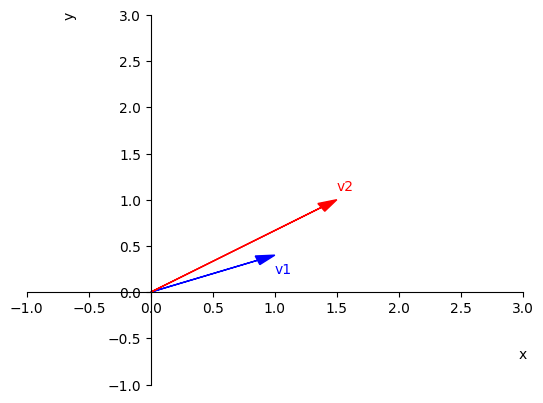

In [ ]:
v1 = [1,.4]
v2 = [1.5,1]
makeMy2Axes(xlim=(-1,3), ylim=(-1,3))
make2DVector(head=v1, color="b")
make2DVector(head=v2, color="r")
plt.annotate(text="v1", color="b", xy=np.array(v1)+np.array([0,-.2]))
plt.annotate(text="v2", color="r", xy=np.array(v2)+np.array([0,.1]));

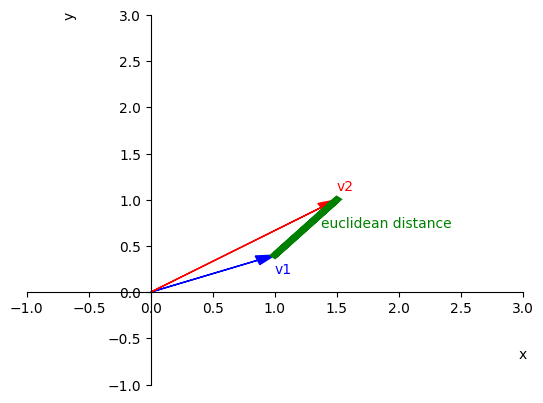

In [ ]:
makeMy2Axes(xlim=(-1,3), ylim=(-1,3))
make2DVector(head=v1, color="b")
make2DVector(head=v2, color="r")
plt.annotate(text="v1", color="b", xy=np.array(v1)+np.array([0,-.2]))
plt.annotate(text="v2", color="r", xy=np.array(v2)+np.array([0,.1]))
make2DVector(head=v1, tail=v2, color="g", headWidth=0, lw=5)
plt.annotate(text="euclidean distance", color="g", xy=(np.array(v1)+np.array(v2) + np.array([.25, 0]))/2);

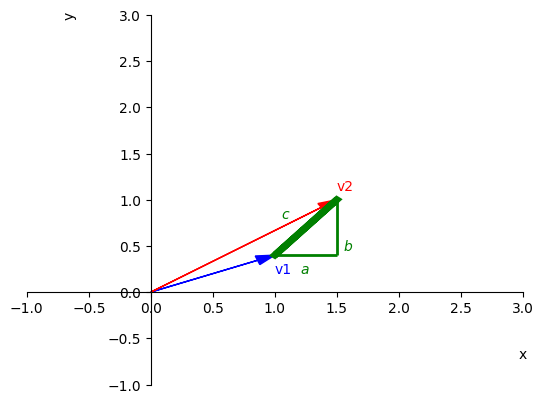

In [ ]:
# The lenght of the (green) vector marking the distance between the tip of v1 and the tip of v2 is
# change in y
makeMy2Axes(xlim=(-1,3), ylim=(-1,3))
make2DVector(head=v1, color="b")
make2DVector(head=v2, color="r")
plt.annotate(text="v1", color="b", xy=np.array(v1)+np.array([0,-.2]))
plt.annotate(text="v2", color="r", xy=np.array(v2)+np.array([0,.1]))
make2DVector(head=v1, tail=v2, color="g", headWidth=0, lw=5)
plt.annotate(text="$c$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([-.4, .2]))/2)
make2DVector(head=[v2[0],v1[1]], tail=v1, color="g", headWidth=0, lw=2)
make2DVector(head=[v2[0],v1[1]], tail=v2, color="g", headWidth=0, lw=2)
plt.annotate(text="$a$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([-.1, -1]))/2)
plt.annotate(text="$b$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([.6, -.5]))/2);

Que pasa si un vector cambia un poquito

In [ ]:
v2 = [i*2 for i in v2] ###

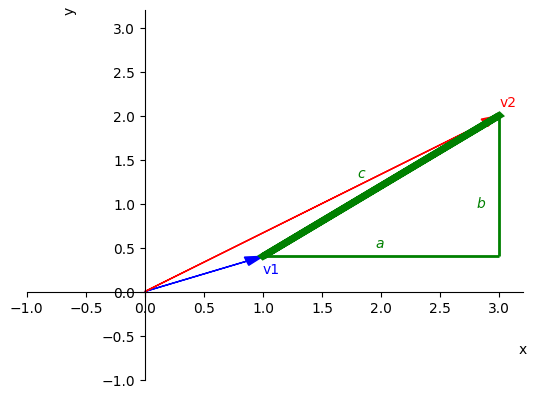

In [ ]:

makeMy2Axes(xlim=(-1,3.2), ylim=(-1,3.2))
make2DVector(head=v1, color="b")
make2DVector(head=v2, color="r")
plt.annotate(text="v1", color="b", xy=np.array(v1)+np.array([0,-.2]))
plt.annotate(text="v2", color="r", xy=np.array(v2)+np.array([0,.1]))
make2DVector(head=v1, tail=v2, color="g", headWidth=0, lw=5)
plt.annotate(text="$c$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([-.4, .2]))/2)
make2DVector(head=[v2[0],v1[1]], tail=v1, color="g", headWidth=0, lw=2)
make2DVector(head=[v2[0],v1[1]], tail=v2, color="g", headWidth=0, lw=2)
plt.annotate(text="$a$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([-.1, -1.4]))/2)
plt.annotate(text="$b$", color="g", xy=(np.array(v1)+np.array(v2) + np.array([1.6, -.5]))/2);

<img src="https://2.bp.blogspot.com/-yC71NkA4QDM/WTZqMGHspxI/AAAAAAAAAiw/PtnsJQlxtpkLJzB6CBazc_L3AHPsyaK-QCPcB/s320/chiste%2Bseno%2B8.jpg">

Mucho mejor! ya que normaliza el tamaño del vector.. lo que mide son ángulos!

$$
\frac{\sum_{i=0}^{n-1}v_{1i}v_{2i}}{\sqrt{\sum_{i=0}^{n-1}v_{1i}^{2}} \sqrt{\sum_{i=0}^{n-1}v_{2i}^{2}} }
$$

In [1]:
doc1="Este es un curso sobre el texto como dato, El curso está separado en módulos"
doc2="El 2020 fue un año muy duro, todos conocemos a alguien que ha perdido un familiar o amigo por una mala política"
doc3="Aprender el cómo usar el texto como dato puede ser útil, aunque duro de aprender, para informar la política pública"
docus=[doc1,doc2,doc3]

In [2]:
for i in docus:
    print(i)

Este es un curso sobre el texto como dato, El curso está separado en módulos
El 2020 fue un año muy duro, todos conocemos a alguien que ha perdido un familiar o amigo por una mala política
Aprender el cómo usar el texto como dato puede ser útil, aunque duro de aprender, para informar la política pública


In [ ]:
def myCosineSim(vec1, vec2):
    import math
    import numpy as np
    vec1n = np.array(vec1)
    vec2n = np.array(vec2)
    return (vec1n * vec2n).sum() / (math.sqrt(((vec1n)**2).sum())*math.sqrt(((vec1n)**2).sum()))


In [ ]:
V12=myCosineSim(vocabAlineado["alignedDocList"][0], vocabAlineado["alignedDocList"][1])
V13=myCosineSim(vocabAlineado["alignedDocList"][0], vocabAlineado["alignedDocList"][2])
V23=myCosineSim(vocabAlineado["alignedDocList"][1], vocabAlineado["alignedDocList"][2])
print(V12)
print(V13)
print(V23)

0.2821350762527233
0.14814814814814817
0.11438474870017329


¿Tiene sentido?


![](https://www.mememaker.net/static/images/memes/4844810.jpg)


In [ ]:
%%timeit -n 500 -o
datos = [2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99]
promedio = sum(datos)/len(datos)
squaredError = 0
for point in datos:
    squaredError += (point-promedio)**2
squaredError/len(datos)

2.86 µs ± 531 ns per loop (mean ± std. dev. of 7 runs, 500 loops each)


<TimeitResult : 2.86 µs ± 531 ns per loop (mean ± std. dev. of 7 runs, 500 loops each)>

In [ ]:
%%timeit -n 1000 -o
datos = np.array([2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99])
promedio = sum(datos)/len(datos)
squaredError = 0
for point in datos:
    squaredError += (point-promedio)**2
squaredError/len(datos)


8.45 µs ± 784 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 8.45 µs ± 784 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
%%timeit -n 1000 -o
datos = np.array([2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99])
promedio = sum(datos)/datos.shape[0]
### Aquí tenemos el ejercicio aprovechando las capacidades del vector
squaredErrorVec = (datos-promedio)**2
sum(squaredErrorVec)/datos.shape[0]


8.56 µs ± 837 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 8.56 µs ± 837 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
%%timeit -n 1000 -o
#item by item variance computation
myData = np.array([2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99])
myMean = sum(myData)/len(myData)
squaredError = 0
for point in myData:
    squaredError += (point-myMean)**2
squaredError/len(myData)


8.64 µs ± 743 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 8.64 µs ± 743 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
%%timeit -n 1000 -o
myData = np.array([2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99,2.3,2.9,2.1,2.67,2.99])
myMean = sum(myData)/myData.shape[0]
#Next line is the vectorization part!
squaredErrorVec = (myData-myMean)**2
sum(squaredErrorVec)/myData.shape[0]

8.85 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 8.85 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>